In [2]:
import os

import networkx as nx
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.color_palette("hls", 8)
sns.set_theme(style="whitegrid")

## Result of DCNDP with B = 0.05n and 0.1n

In [3]:
dcndp_df_first = pd.read_csv('dcndp_one_b_10%.csv', delimiter=';')
dcndp_df_first['b'] = '0.1n'
dcndp_df_second = pd.read_csv('dcndp_one_b_5%.csv', delimiter=';')
dcndp_df_second['b'] = '0.05n'

In [4]:
dcndp_df_first

,Graph,n_nodes,n_edges,diameter,init_obj,final_obj,cost,n_vars_sol,distance-based pairwise connectivity,work,Status,callback_time (s),run_time (s),b
0,Hi-Tech,33,91,5,"88,30%","55,49%",3,561,297,"0,11",2,"0,19","0,36",0.1n
1,Karate,34,78,5,"85,6%","26,2%",3,595,147,"0,011",2,"0,03","0,05",0.1n
2,Mexican,35,117,4,"98,0%","60,17%",3,630,358,"0,065",2,"0,06","0,16",0.1n
3,Sawmill,36,62,8,"63,0%","21,43%",3,666,135,"0,005",2,"0,02","0,04",0.1n
4,Chesapeake,39,170,3,"100,0%","69,1%",3,780,512,"0,23",2,"0,29","0,55",0.1n
5,Dolphins,62,159,8,"58,5%","30,83%",6,1953,583,"0,63",2,"0,64","1,22",0.1n
6,Lesmiserable,77,254,5,"85,4%","11,04%",7,3003,323,"0,22",2,"0,36","0,57",0.1n
7,Santafe,118,200,12,"32,9%","1,68%",11,7021,116,"0,039",2,"0,3","0,43",0.1n
8,Sanjuansur,75,155,7,"48,7%","16,47%",7,2850,457,"0,09",2,"0,19","0,42",0.1n
9,Attiro,59,128,8,"68,00%","25,95%",5,1770,444,"0,091",2,"0,15","0,35",0.1n


In [5]:
dcndp_df_second

,Graph,n_nodes,n_edges,diameter,init_obj,final_obj,cost,n_vars_sol,distance-based pairwise connectivity,work,Status,callback_time (s),run_time (s),b
0,Hi-Tech,33,91,5,"88,30%","75,19%",1,561,397,"0,293",2,0.05,0.12,0.05n
1,Karate,34,78,5,"85,6%","57,75%",1,595,324,"0,196",2,0.04,0.07,0.05n
2,Mexican,35,117,4,"98,0%","88,57%",1,630,527,"0,05",2,0.07,0.16,0.05n
3,Sawmill,36,62,8,"63,0%","34,1%",1,666,215,"0,003",2,0.03,0.07,0.05n
4,Chesapeake,39,170,3,"100,0%","93,93%",1,780,696,"0,11",2,"0,2","0,32",0.05n
5,Dolphins,62,159,8,"58,5%","43,36%",3,1953,820,"0,27",2,"0,48","0,88",0.05n
6,Lesmiserable,77,254,5,"85,4%","31,78%",3,3003,930,"0,22",2,"0,33","0,73",0.05n
7,Santafe,118,200,12,"32,9%","4,42%",5,7021,305,"0,07",2,"0,47","0,69",0.05n
8,Sanjuansur,75,155,7,"48,7%","28,94%",3,2850,803,"0,05",2,"0,13","0,24",0.05n
9,Attiro,59,128,8,"68,00%","43,42%",2,1770,743,"0,43",2,0.09,0.16,0.05n


In [6]:
dcndp_df_first['init_obj'] = dcndp_df_first['init_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_first['final_obj'] = dcndp_df_first['final_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_first['callback_time (s)'] = dcndp_df_first['callback_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)
dcndp_df_first['run_time (s)'] = dcndp_df_first['run_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)

In [7]:
dcndp_df_second['init_obj'] = dcndp_df_second['init_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_second['final_obj'] = dcndp_df_second['final_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_second['callback_time (s)'] = dcndp_df_second['callback_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)
dcndp_df_second['run_time (s)'] = dcndp_df_second['run_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)

In [8]:
all_df = [dcndp_df_first, dcndp_df_second]
dcnp_1 = pd.concat(all_df, ignore_index=True)
dcnp_1.columns

Index(['Graph', 'n_nodes', 'n_edges', 'diameter ', 'init_obj', 'final_obj',
       'cost', 'n_vars_sol', 'distance-based pairwise connectivity', 'work',
       'Status', 'callback_time (s)', 'run_time (s)', 'b'],
      dtype='object')

In [9]:
dcnp_1

,Graph,n_nodes,n_edges,diameter,init_obj,final_obj,cost,n_vars_sol,distance-based pairwise connectivity,work,Status,callback_time (s),run_time (s),b
0,Hi-Tech,33,91,5,88.3,55.49,3,561,297,"0,11",2,0.19,0.36,0.1n
1,Karate,34,78,5,85.6,26.20,3,595,147,"0,011",2,0.03,0.05,0.1n
2,Mexican,35,117,4,98.0,60.17,3,630,358,"0,065",2,0.06,0.16,0.1n
3,Sawmill,36,62,8,63.0,21.43,3,666,135,"0,005",2,0.02,0.04,0.1n
4,Chesapeake,39,170,3,100.0,69.10,3,780,512,"0,23",2,0.29,0.55,0.1n
5,Dolphins,62,159,8,58.5,30.83,6,1953,583,"0,63",2,0.64,1.22,0.1n
6,Lesmiserable,77,254,5,85.4,11.04,7,3003,323,"0,22",2,0.36,0.57,0.1n
7,Santafe,118,200,12,32.9,1.68,11,7021,116,"0,039",2,0.30,0.43,0.1n
8,Sanjuansur,75,155,7,48.7,16.47,7,2850,457,"0,09",2,0.19,0.42,0.1n
9,Attiro,59,128,8,68.0,25.95,5,1770,444,"0,091",2,0.15,0.35,0.1n


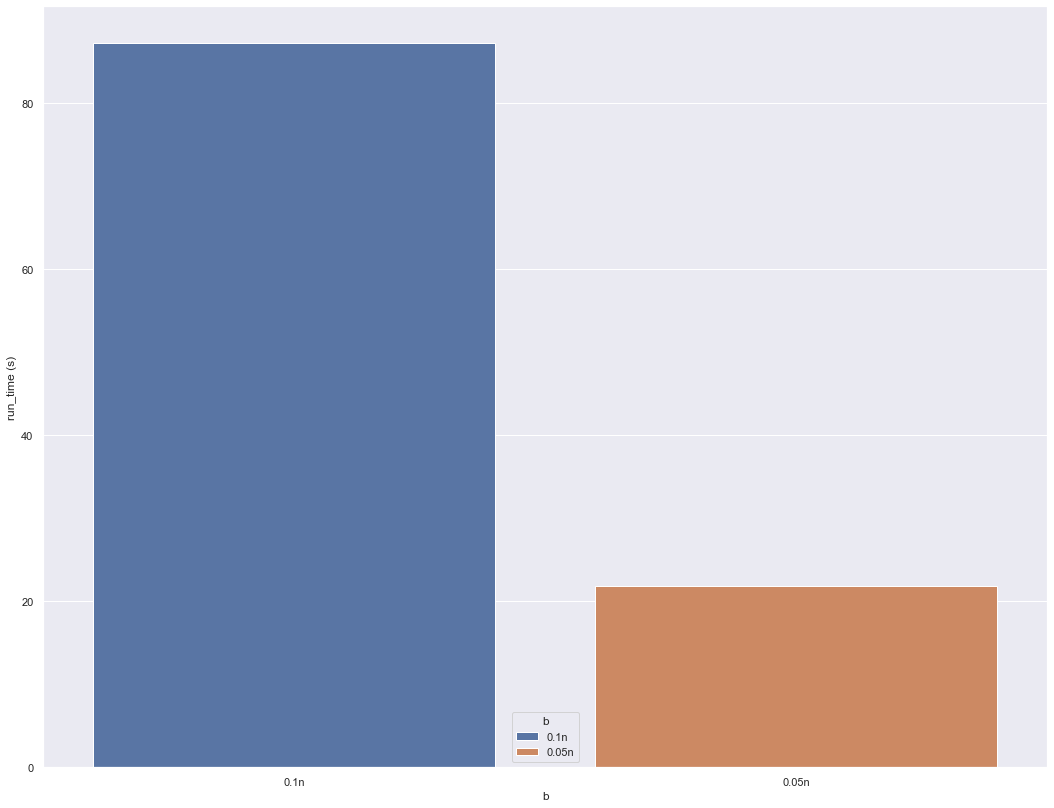

In [10]:
import matplotlib as plt
sns.set(rc = {'figure.figsize':(18,14)})
ax = sns.barplot(
        data= dcnp_1,
        x='b',
        y='run_time (s)',
        hue='b',
        ci=None,
        dodge=False
    )
fig = ax.get_figure()
fig.savefig("figures/dcnp1.jpeg")

In [11]:
dcnp_1

,Graph,n_nodes,n_edges,diameter,init_obj,final_obj,cost,n_vars_sol,distance-based pairwise connectivity,work,Status,callback_time (s),run_time (s),b
0,Hi-Tech,33,91,5,88.3,55.49,3,561,297,"0,11",2,0.19,0.36,0.1n
1,Karate,34,78,5,85.6,26.20,3,595,147,"0,011",2,0.03,0.05,0.1n
2,Mexican,35,117,4,98.0,60.17,3,630,358,"0,065",2,0.06,0.16,0.1n
3,Sawmill,36,62,8,63.0,21.43,3,666,135,"0,005",2,0.02,0.04,0.1n
4,Chesapeake,39,170,3,100.0,69.10,3,780,512,"0,23",2,0.29,0.55,0.1n
5,Dolphins,62,159,8,58.5,30.83,6,1953,583,"0,63",2,0.64,1.22,0.1n
6,Lesmiserable,77,254,5,85.4,11.04,7,3003,323,"0,22",2,0.36,0.57,0.1n
7,Santafe,118,200,12,32.9,1.68,11,7021,116,"0,039",2,0.30,0.43,0.1n
8,Sanjuansur,75,155,7,48.7,16.47,7,2850,457,"0,09",2,0.19,0.42,0.1n
9,Attiro,59,128,8,68.0,25.95,5,1770,444,"0,091",2,0.15,0.35,0.1n


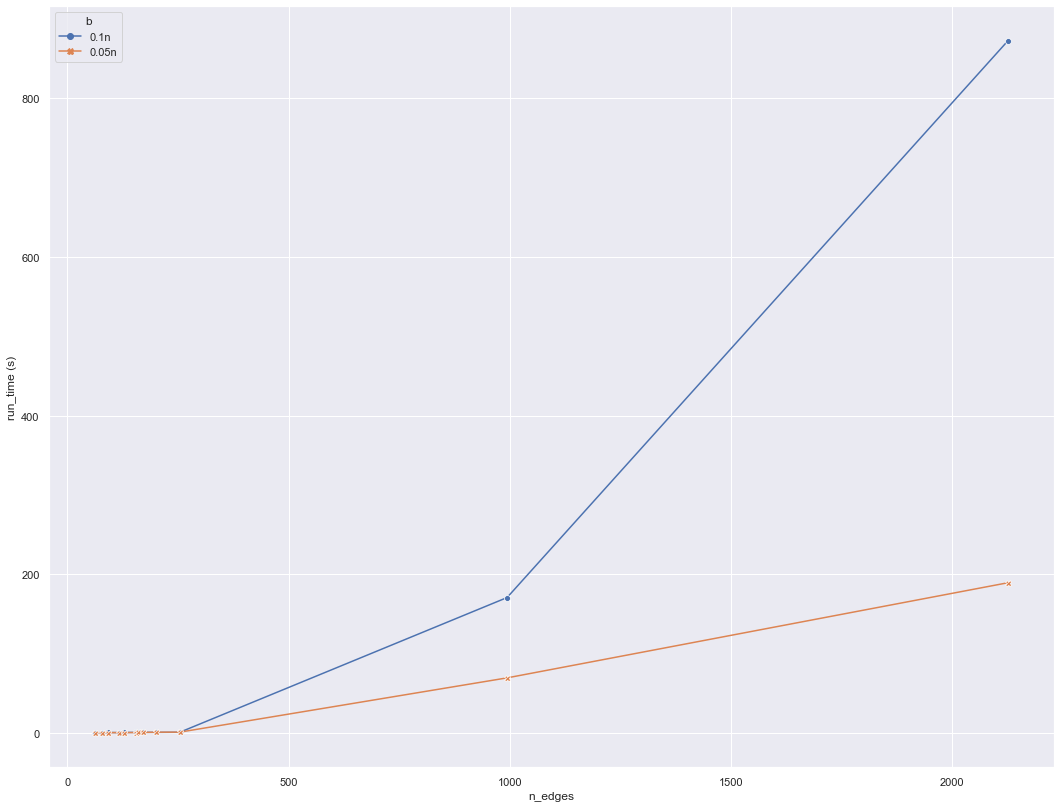

In [12]:
ax = sns.lineplot(
    data=dcnp_1,
    x='n_edges',
    y='run_time (s)',
    hue='b', style='b',
    markers=True, dashes=False
)
fig = ax.get_figure()
fig.savefig("figures/dcnp1_scalability.jpeg")

## Comparison btw DCNDP_1 and DCNDP_2

In [13]:
dcndp_1 = pd.read_csv('../../cluster_script/result_cost_dcndp_1_small_test.csv')
dcndp_2 = pd.read_csv('../../cluster_script/result_cost_dcndp_2_small_test.csv')
dcndp_1['type'] = 'DCNDP1'
dcndp_2['type'] = 'DCNDP2'

In [14]:
#dcndp_1['init_obj'] = dcndp_df_first['init_obj'].apply(lambda v: v.split('%')[0]).astype(float)
dcndp_1['final_obj'] = dcndp_1['final_obj'].apply(lambda v: v.split('%')[0]).astype(float)
dcndp_2['final_obj'] = dcndp_2['final_obj'].apply(lambda v: v.split('%')[0]).astype(float)
dcndp_small_test_full = pd.concat([dcndp_1, dcndp_2], ignore_index=True, axis=0)
dcndp_small_test_full

,Graph_name,n_nodes,n_edges,diameter,b,cost,final_obj,n_vars,status,run_time,type
0,HI_TECH,33,91,5,0.001,0,88.26,561,2,0.024,DCNDP1
1,SANTAFE,118,200,12,0.001,0,32.93,7021,2,0.075,DCNDP1
2,ATTIRO,59,128,8,0.001,0,68.03,1770,2,0.036,DCNDP1
3,DOLPHINS,62,159,8,0.001,0,58.54,1953,2,0.033,DCNDP1
4,CHESAPEAKE,39,170,3,0.001,0,100.00,780,2,0.020,DCNDP1
...,...,...,...,...,...,...,...,...,...,...,...
395,DOLPHINS,62,159,8,0.097,6,18.63,15190,2,4.358,DCNDP2
396,CHESAPEAKE,39,170,3,0.097,3,35.87,2262,2,0.215,DCNDP2
397,MEXICAN,35,117,4,0.097,3,36.58,2415,2,0.198,DCNDP2
398,KARATE,34,78,5,0.097,3,16.69,2839,2,0.123,DCNDP2


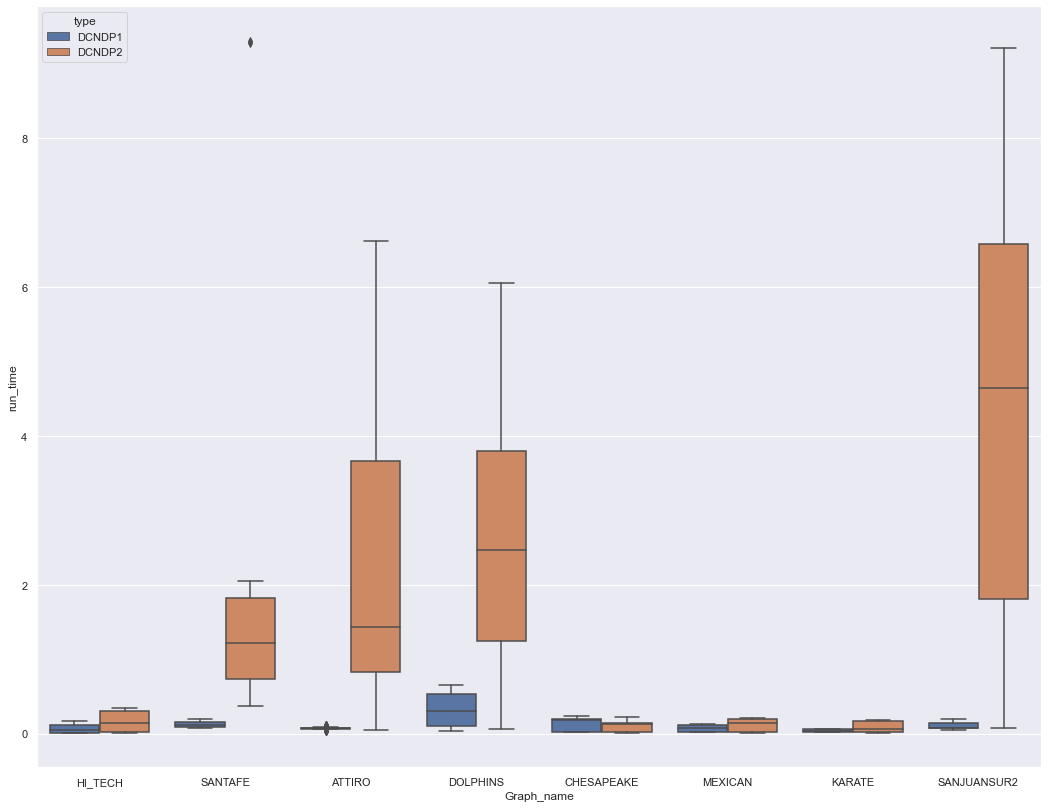

In [15]:
ax = sns.boxplot(
    data= dcndp_small_test_full,
    x='Graph_name',
    y='run_time',
    hue='type'
)
fig = ax.get_figure()
fig.savefig("figures/boxplot_runtime_dcndp_1vs2.jpeg")

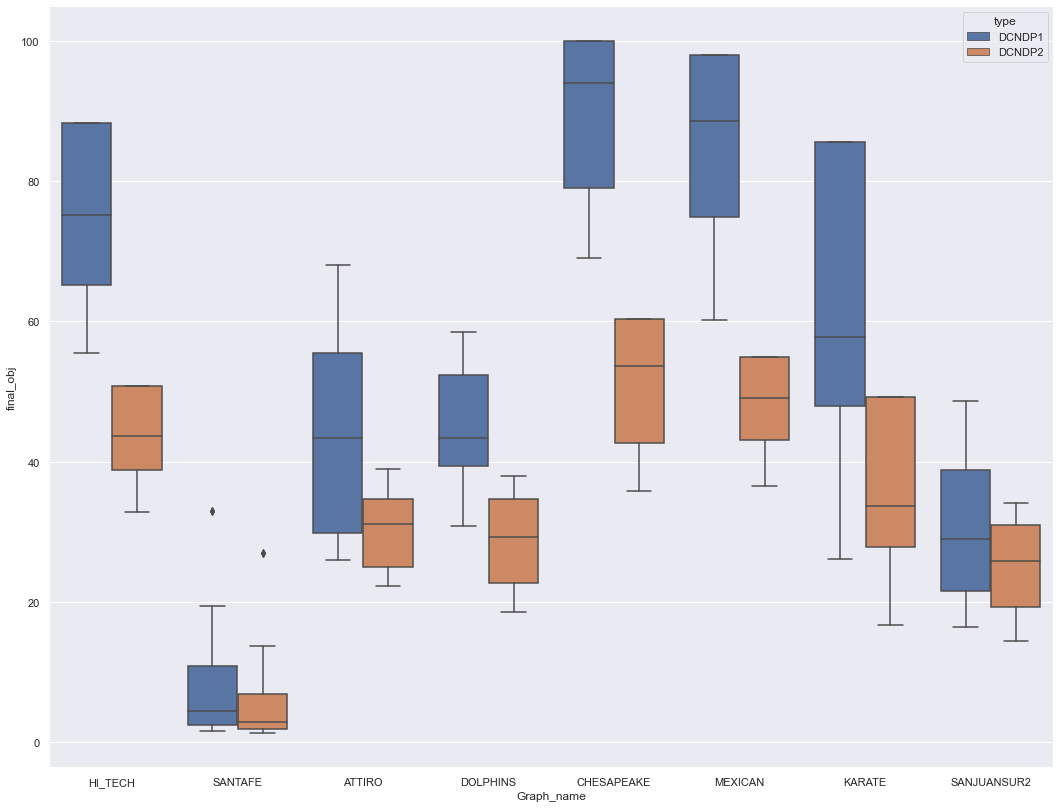

In [16]:
ax = sns.boxplot(
    data= dcndp_small_test_full,
    x='Graph_name',
    y='final_obj',
    hue='type'
)
fig = ax.get_figure()
fig.savefig("figures/boxplot_obj_dcndp_1vs2.jpeg")

In [17]:
df = pd.read_csv('big_world_dcndp_one_vs_two.csv', delimiter=';')
df

,Graph,n_nodes,n_edges,diameter,init_obj,budget,final_obj,callback_time,run_time,type
0,SmallWorld,233,994,4,"95,2%",0.1n,"6,27%","55,42","170,52",DCNDP1
1,SmallWorld,233,994,4,"95,2%",0.05n,"17,13%","31,1","69,2",DCNDP1
2,SmallWorld,233,994,4,"95,2%",0.03n,"23,41%","1,75","6,9",DCNDP1
3,SmallWorld,233,994,4,"95,2%",0.01n,"48,69%","4,35","20,06",DCNDP1
4,SmallWorld,233,994,4,"95,2%",0.07n,"11,63%","50,73","100,62",DCNDP1
5,SmallWorld,233,994,4,"95,2%",0.1n,"4,02%","12,67","433,98",DCNDP2
6,SmallWorld,233,994,4,"95,2%",0.05n,"9,28%","13,56","194,32",DCNDP2
7,SmallWorld,233,994,4,"95,2%",0.03n,"12,59%","1,62","15,01",DCNDP2
8,SmallWorld,233,994,4,"95,2%",0.01n,"28,55%","5,92","131,06",DCNDP2
9,SmallWorld,233,994,4,"95,2%",0.07n,"6,87%","18,51","333,04",DCNDP2


In [18]:
df['final_obj'] = df['final_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
df['callback_time'] = df['callback_time'].apply(lambda v: v.replace(',', '.')).astype(float)
df['run_time'] = df['run_time'].apply(lambda v: v.replace(',', '.')).astype(float)

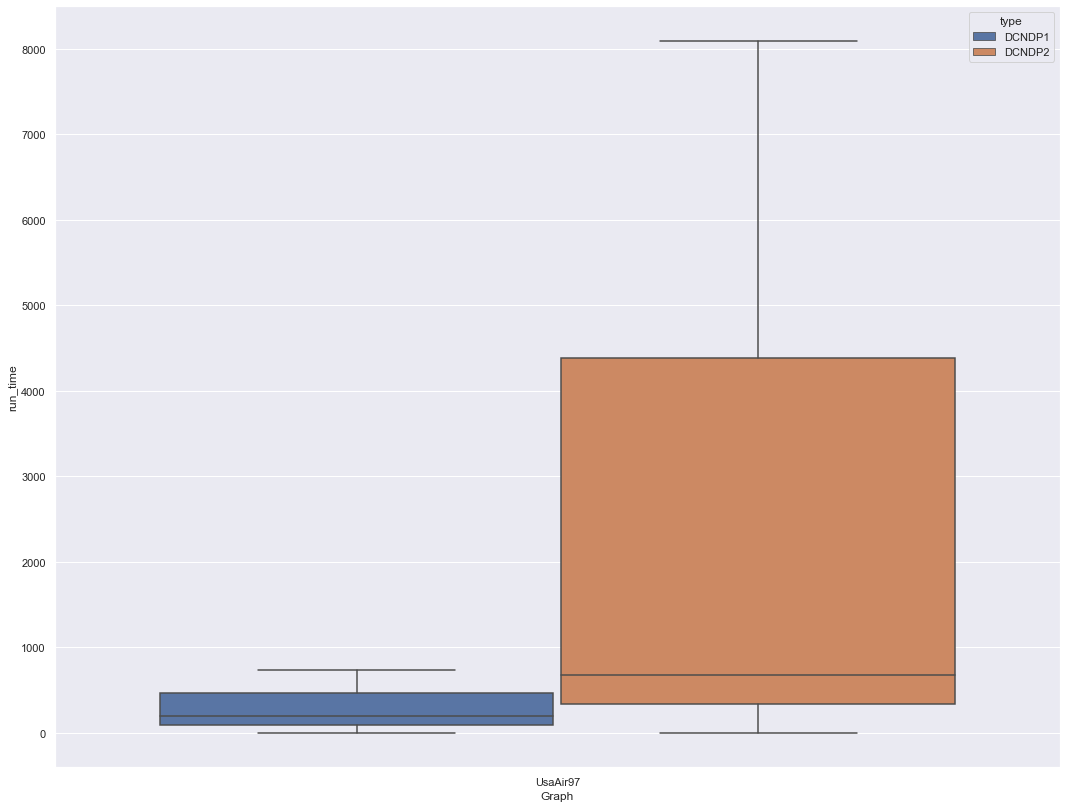

In [19]:
world = df[df['Graph'] == 'UsaAir97']
ax = sns.boxplot(
    data= world,
    x='Graph',
    y='run_time',
    hue='type'
)
fig = ax.get_figure()
fig.savefig("figures/boxplot_runtime_dcndp_1vs2_UsaAir97.jpeg")

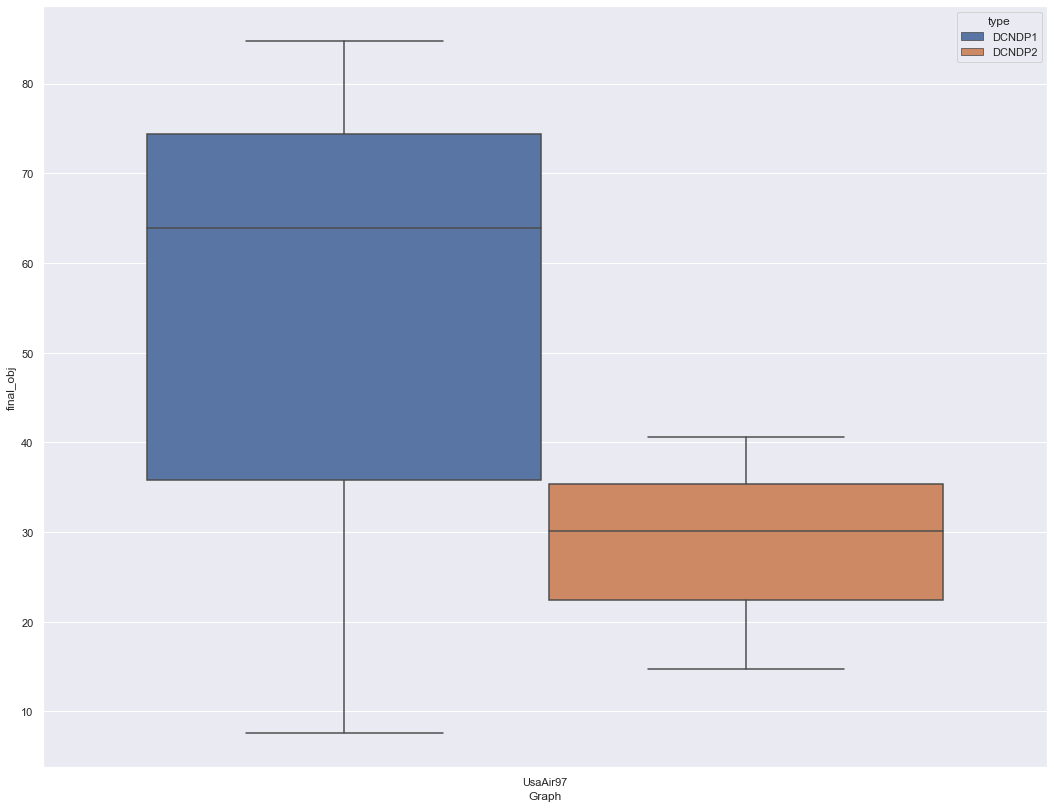

In [20]:
ax = sns.boxplot(
    data= world,
    x='Graph',
    y='final_obj',
    hue='type'
)
fig = ax.get_figure()
fig.savefig("figures/boxplot_gap_dcndp_1vs2_UsaAir97.jpeg")

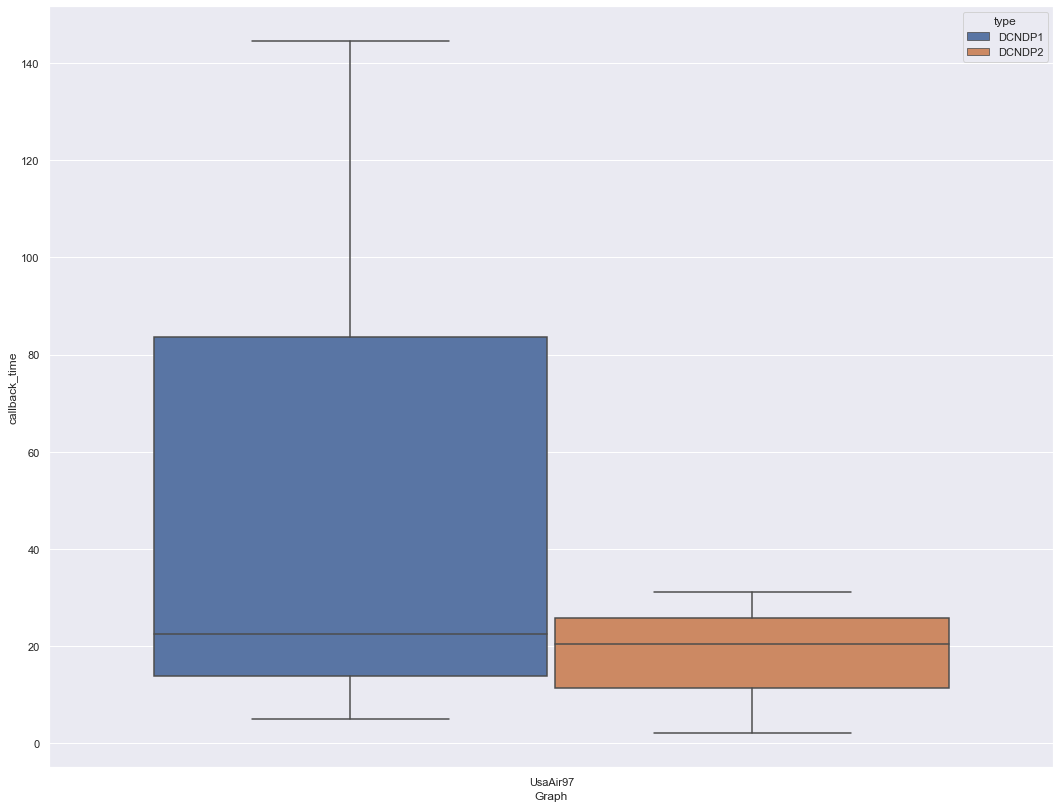

In [21]:
ax = sns.boxplot(
    data= world,
    x='Graph',
    y='callback_time',
    hue='type'
)
fig = ax.get_figure()
fig.savefig("figures/boxplot_callback_dcndp_1vs2_UsaAir97.jpeg")

## Comparison btw DCNDP_1 and DCNDP_2 with B = 0.05n

In [22]:
dcndp_df_2 = pd.read_csv('dcndp_two_b_5%.csv', delimiter=';')
dcndp_df_2['type'] = 'DCNPD2'
dcndp_df_1 = pd.read_csv('dcndp_one_b_5%.csv', delimiter=';')
dcndp_df_1['type'] = 'DCNPD1'

In [23]:
dcndp_df_1['init_obj'] = dcndp_df_1['init_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_1['final_obj'] = dcndp_df_1['final_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_1['callback_time (s)'] = dcndp_df_1['callback_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)
dcndp_df_1['run_time (s)'] = dcndp_df_1['run_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)

In [24]:
dcndp_df_2['init_obj'] = dcndp_df_2['init_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_2['final_obj'] = dcndp_df_2['final_obj'].apply(lambda v: v.split('%')[0].replace(',', '.')).astype(float)
dcndp_df_2['callback_time (s)'] = dcndp_df_2['callback_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)
dcndp_df_2['run_time (s)'] = dcndp_df_2['run_time (s)']\
    .apply(lambda v: v.replace(',', '.')).astype(float)

In [25]:
dcndp_df_1.drop(index=[10,11], axis=0, inplace=True)

In [26]:
all_df = [dcndp_df_1, dcndp_df_2]
dcnp_1_2 = pd.concat(all_df, ignore_index=True)

In [27]:
dcnp_1_2

,Graph,n_nodes,n_edges,diameter,init_obj,final_obj,cost,n_vars_sol,distance-based pairwise connectivity,work,Status,callback_time (s),run_time (s),type
0,Hi-Tech,33,91,5,88.3,75.19,1,561,397,"0,293",2,0.05,0.12,DCNPD1
1,Karate,34,78,5,85.6,57.75,1,595,324,"0,196",2,0.04,0.07,DCNPD1
2,Mexican,35,117,4,98.0,88.57,1,630,527,"0,05",2,0.07,0.16,DCNPD1
3,Sawmill,36,62,8,63.0,34.10,1,666,215,"0,003",2,0.03,0.07,DCNPD1
4,Chesapeake,39,170,3,100.0,93.93,1,780,696,"0,11",2,0.20,0.32,DCNPD1
5,Dolphins,62,159,8,58.5,43.36,3,1953,820,"0,27",2,0.48,0.88,DCNPD1
6,Lesmiserable,77,254,5,85.4,31.78,3,3003,930,"0,22",2,0.33,0.73,DCNPD1
7,Santafe,118,200,12,32.9,4.42,5,7021,305,"0,07",2,0.47,0.69,DCNPD1
8,Sanjuansur,75,155,7,48.7,28.94,3,2850,803,"0,05",2,0.13,0.24,DCNPD1
9,Attiro,59,128,8,68.0,43.42,2,1770,743,"0,43",2,0.09,0.16,DCNPD1


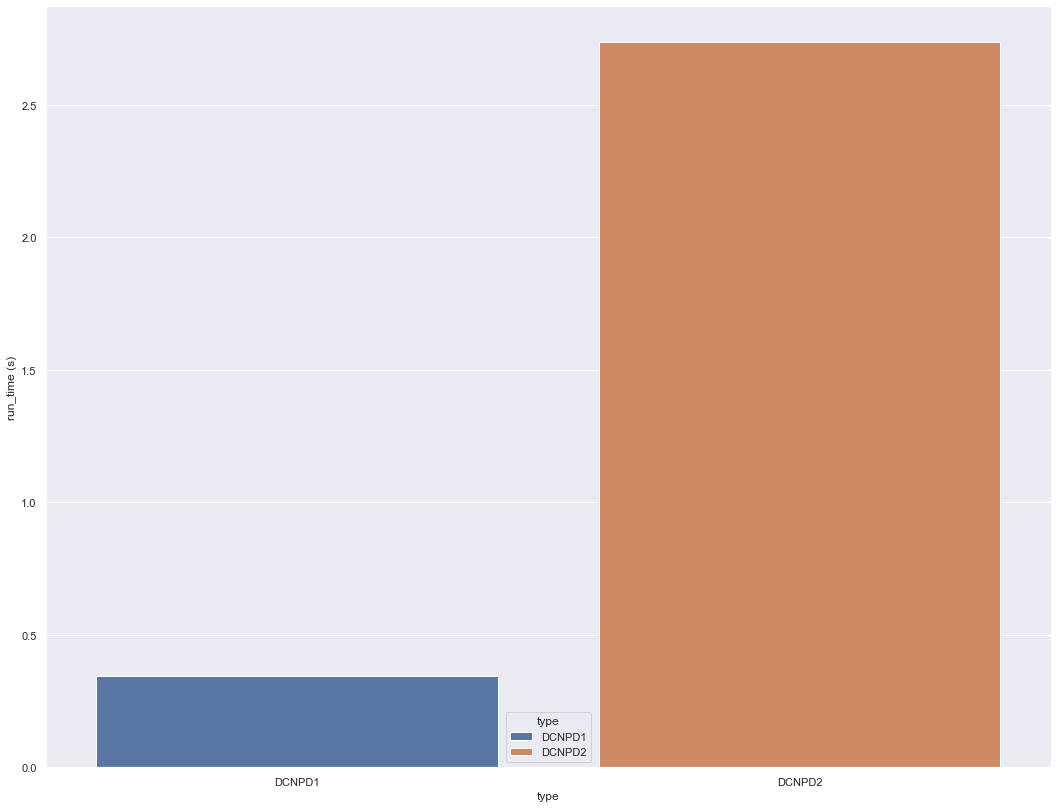

In [28]:
ax = sns.barplot(
    data= dcnp_1_2,
    x='type',
    y='run_time (s)',
    hue='type',
    ci=None,
    dodge=False
)
fig = ax.get_figure()
fig.savefig("figures/dcnp1_vs_2.jpeg")

In [48]:
scalability_dcndp1 = pd.read_csv('../../cluster_script/result_cost_dcndp_1_scalability_B_cost.csv')
dcndp_1_scalability = scalability_dcndp1[(scalability_dcndp1['Graph_name'] != 'BA1(1)') & (scalability_dcndp1['Graph_name'] != 'BA1(2)')].copy()

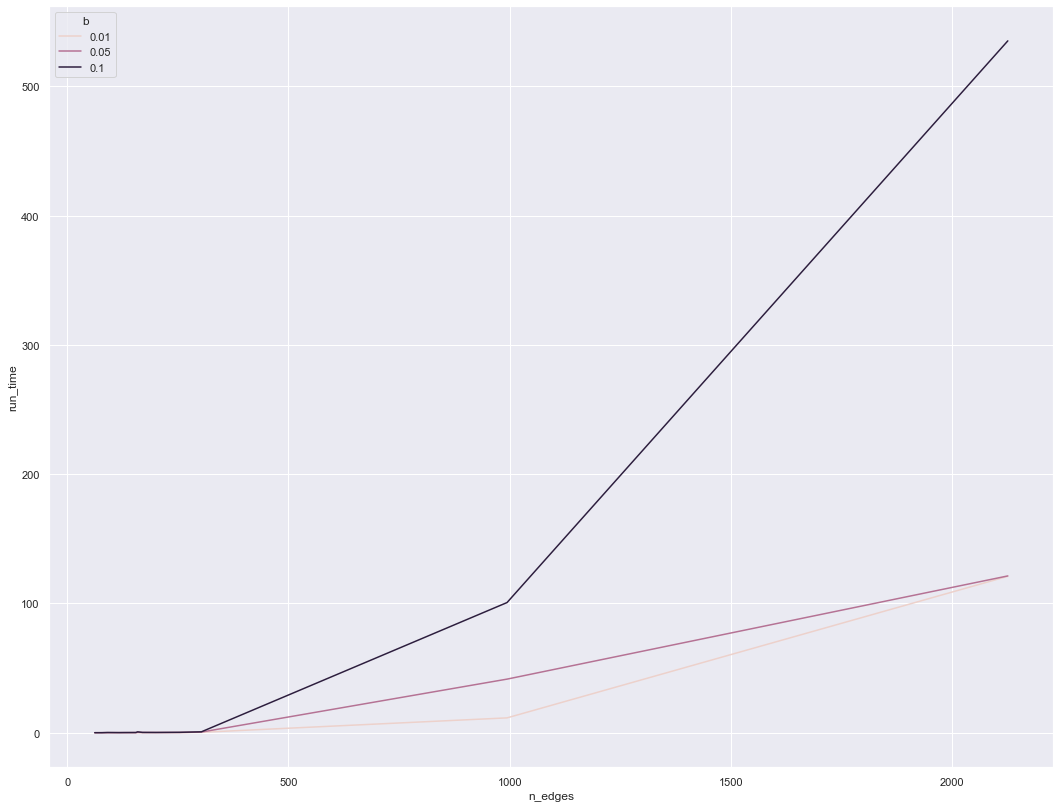

In [49]:
ax = sns.lineplot(
    data=dcndp_1_scalability,
    x='n_edges',
    y='run_time',
    hue='b',
    markers=True, dashes=False
)
fig = ax.get_figure()
fig.savefig("figures/dcnp1_scalability_at_different_B.jpeg")

In [50]:
dcndp_1_scalability['final_obj'] = dcndp_1_scalability['final_obj'].apply(lambda v: v.split('%')[0]).astype(float)
dcndp_1_scalability

,Graph_name,n_nodes,n_edges,diameter,b,cost,final_obj,n_vars,status,run_time
0,HI_TECH,33,91,5,0.01,0,88.26,561,2,0.024
1,SMALLWORLD,233,994,4,0.01,2,48.69,27261,2,11.485
2,LESMISERABLE,77,254,5,0.01,0,85.44,3003,2,0.078
4,SANTAFE,118,200,12,0.01,1,19.47,7021,2,0.136
5,ATTIRO,59,128,8,0.01,0,68.03,1770,2,0.034
6,DOLPHINS,62,159,8,0.01,0,58.54,1953,2,0.034
7,CHESAPEAKE,39,170,3,0.01,0,100.00,780,2,0.020
8,MEXICAN,35,117,4,0.01,0,97.98,630,2,0.017
9,KARATE,34,78,5,0.01,0,85.56,595,2,0.014
10,LINDENSTRASSE,232,303,13,0.01,2,9.39,27028,2,0.309


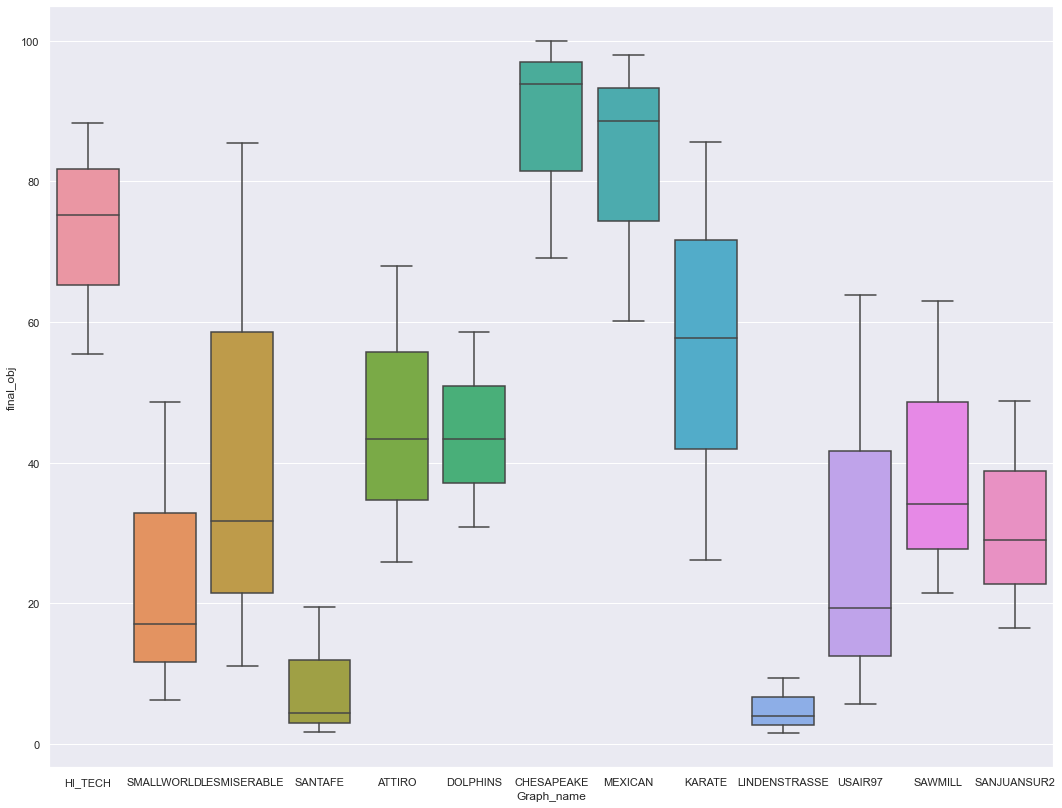

In [51]:
ax = sns.boxplot(
    data=dcndp_1_scalability,
    x='Graph_name',
    y='final_obj',
)
fig = ax.get_figure()
fig.savefig("figures/dcnp1_scalability_at_different_B_gap_finalobj.jpeg")

In [33]:
scalability_dcndp2 = pd.read_csv('../../cluster_script/result_cost_dcndp_2_scalability_B_cost.csv')
scalability_dcndp2

,Graph_name,n_nodes,n_edges,diameter,b,cost,final_obj,n_vars,status,run_time
0,HI_TECH,33,91,5,0.05,1,43.69%,2673,2,0.149
1,SMALLWORLD,233,994,4,0.05,11,9.28%,108345,2,113.941
2,LESMISERABLE,77,254,5,0.05,3,18.44%,14707,2,1.193
3,SANTAFE,118,200,12,0.05,5,2.95%,82954,2,0.703
4,ATTIRO,59,128,8,0.05,2,31.11%,13747,2,1.393
5,DOLPHINS,62,159,8,0.05,3,29.33%,15190,2,6.039
6,CHESAPEAKE,39,170,3,0.05,1,53.71%,2262,2,0.121
7,MEXICAN,35,117,4,0.05,1,49.06%,2415,2,0.141
8,KARATE,34,78,5,0.05,1,33.74%,2839,2,0.055
9,LINDENSTRASSE,232,303,13,0.05,11,8.77%,348580,9,3600.394


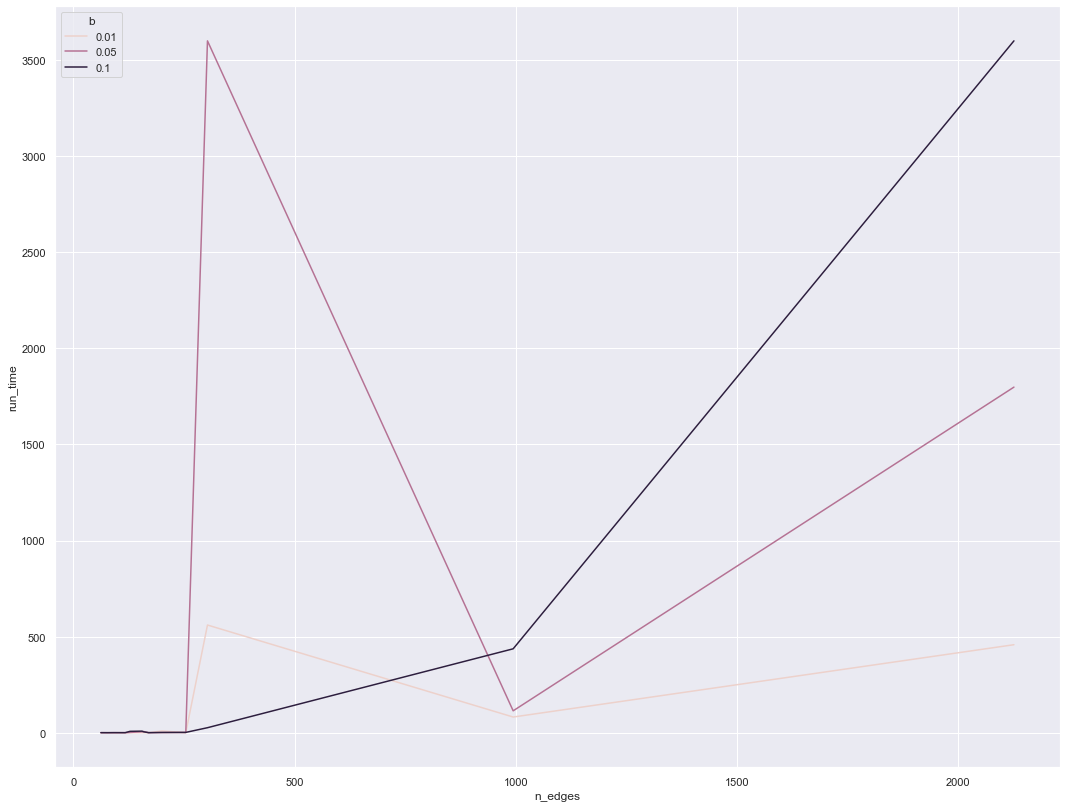

In [36]:
ax = sns.lineplot(
    data=scalability_dcndp2,
    x='n_edges',
    y='run_time',
    hue='b'
)
fig = ax.get_figure()
fig.savefig("figures/dcnp2_scalability.jpeg")

In [155]:
dcndp1 = pd.read_csv('dcndp_1_1.csv', delimiter=';')
dcndp1['run_time (s)'] = dcndp1['run_time (s)'].apply(lambda v: v.replace(',', '.')).astype(float)

In [156]:
dcndp1.columns = ['Graph_name', 'n_nodes', 'n_edges', 'diameter ', 'init_obj', 'final_obj',
                  'cost', 'n_vars_sol', 'distance-based pairwise connectivity', 'work',
                  'Status', 'callback_time', 'run_time']

In [157]:
dcndp1 = dcndp1[['Graph_name', 'n_nodes', 'n_edges', 'final_obj', 'run_time']].copy()
dcndp1['type'] = 'DCNDP1'

In [158]:
dcndp2 = scalability_dcndp2[scalability_dcndp2['b'] == 0.1].copy()
dcndp2 = dcndp2[['Graph_name', 'n_nodes', 'n_edges', 'final_obj', 'run_time']].copy()
dcndp2['type'] = 'DCNDP2'

In [159]:
all_df = [dcndp1, dcndp2]
dcnp_scal_12 = pd.concat(all_df, ignore_index=True, axis=0)
dcnp_scal_12['run_time'] = dcnp_scal_12['run_time'].astype(float)

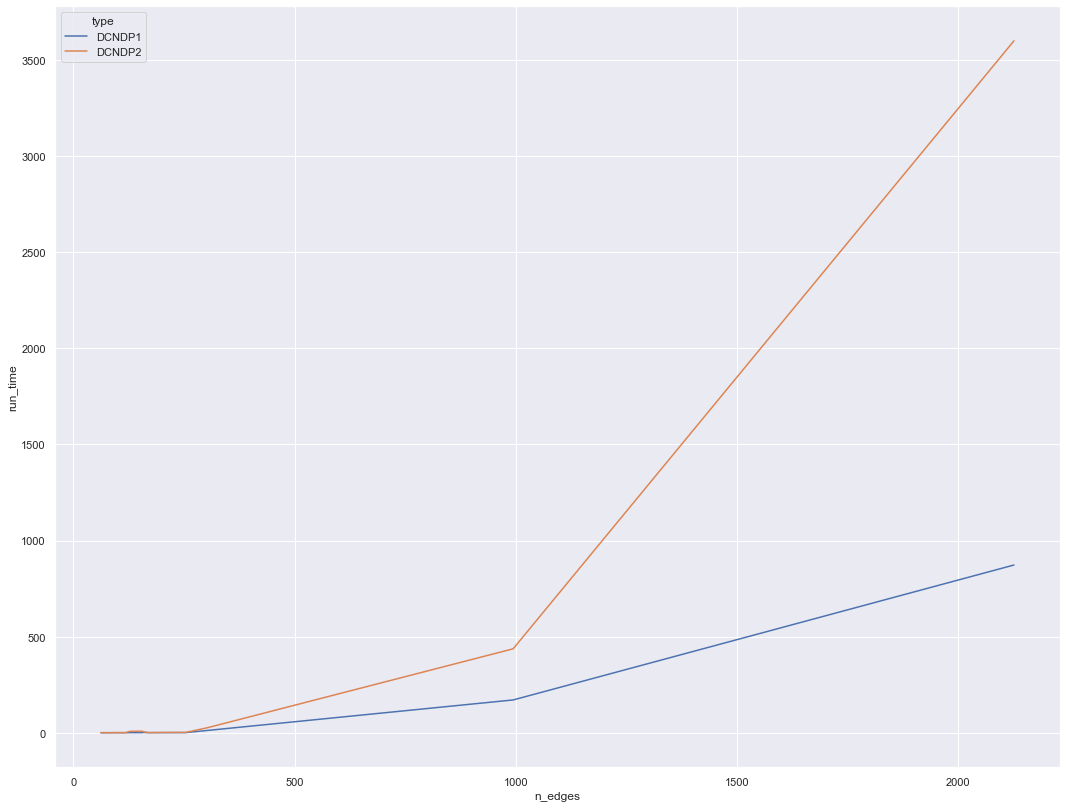

In [165]:
ax = sns.lineplot(
    data=dcnp_scal_12,
    x='n_edges',
    y='run_time',
    hue='type',
    markers=True, dashes=False
)
fig = ax.get_figure()
fig.savefig("figures/dcnp12_scalability_cost_10%.jpeg")

In [53]:
dcndp_2_b_5 = scalability_dcndp2[(scalability_dcndp2['b'] == 0.05)].copy()
dcndp_2_b_5['type'] = 'DCNDP2'
dcndp_2_b_1 = scalability_dcndp2[(scalability_dcndp2['b'] == 0.01)].copy()
dcndp_2_b_1['type'] = 'DCNDP2'

In [60]:
dcndp_1_b_5 = dcndp_1_scalability[(dcndp_1_scalability['b'] == 0.05)].copy()
dcndp_1_b_5['type'] = 'DCNDP1'
dcndp_1_b_1 = dcndp_1_scalability[(dcndp_1_scalability['b'] == 0.01)].copy()
dcndp_1_b_1['type'] = 'DCNDP1'

In [61]:
dcndp_1_2_b_5 = pd.concat([dcndp_1_b_5, dcndp_2_b_5], ignore_index=True)
dcndp_1_2_b_1 = pd.concat([dcndp_1_b_1, dcndp_2_b_1], ignore_index=True)

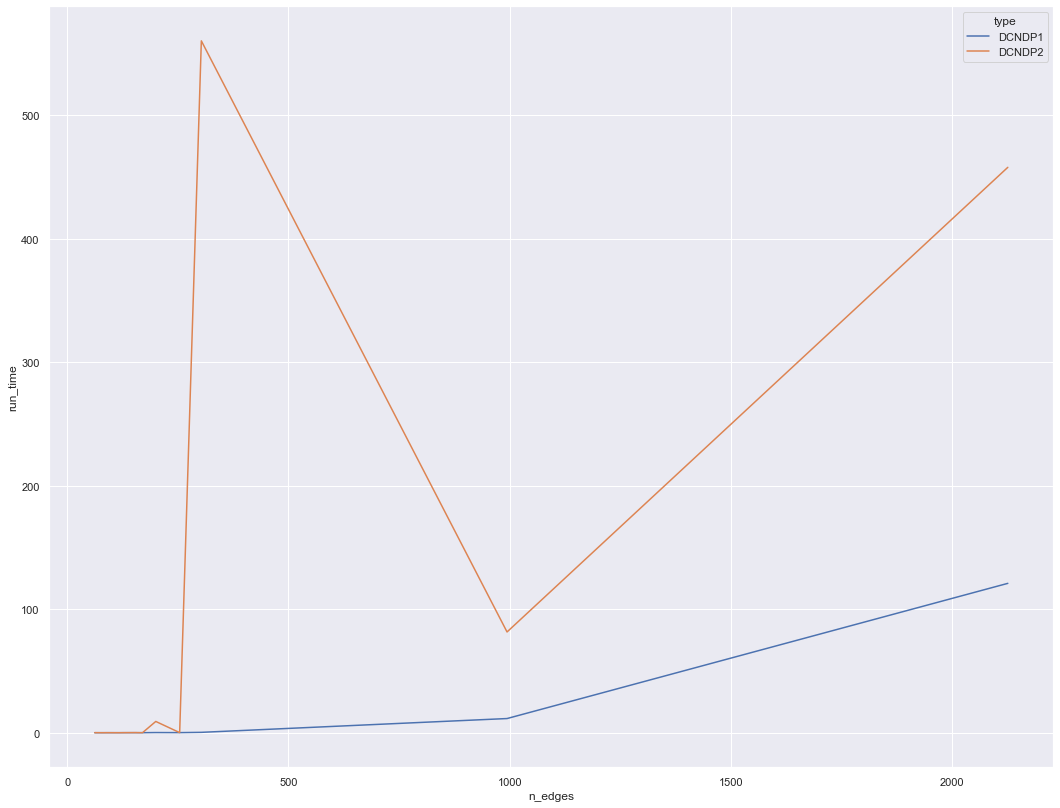

In [63]:
ax = sns.lineplot(
    data=dcndp_1_2_b_1,
    x='n_edges',
    y='run_time',
    hue='type'
)
fig = ax.get_figure()
fig.savefig("figures/dcnp12_scalability_cost_1%.jpeg")

# Comparison DCNDP Base vs 1

In [48]:
dcndp_base_one = pd.read_csv("dcndp_base_versus_one.csv", delimiter=';')

In [49]:
dcndp_base_one['run_time'] = dcndp_base_one['run_time'].apply(lambda v : v.replace(',', '.')).astype(float)
dcndp_base_one['run_time_10%'] = dcndp_base_one['run_time_10%'].apply(lambda v : v.replace(',', '.')).astype(float)

In [50]:
dcndp_base_one

,graph,n_nodes,n_edges,diameter,run_time,run_time_10%,Type
0,Hi-Tech,33,91,5,0.12,0.59,DCNDP_BASE
1,Karate,34,78,5,0.16,0.11,DCNDP_BASE
2,Mexican,35,117,4,0.31,0.33,DCNDP_BASE
3,Sawmill,36,62,8,0.08,0.08,DCNDP_BASE
4,Chesapeake,39,170,3,0.60,1.36,DCNDP_BASE
5,Dolphins,62,159,8,1.91,1.91,DCNDP_BASE
6,Lesmiserable,77,254,5,0.52,0.97,DCNDP_BASE
7,Santafe,118,200,12,0.20,0.59,DCNDP_BASE
8,Sanjuansur,75,155,7,0.44,0.39,DCNDP_BASE
9,Attiro,59,128,8,0.39,0.67,DCNDP_BASE


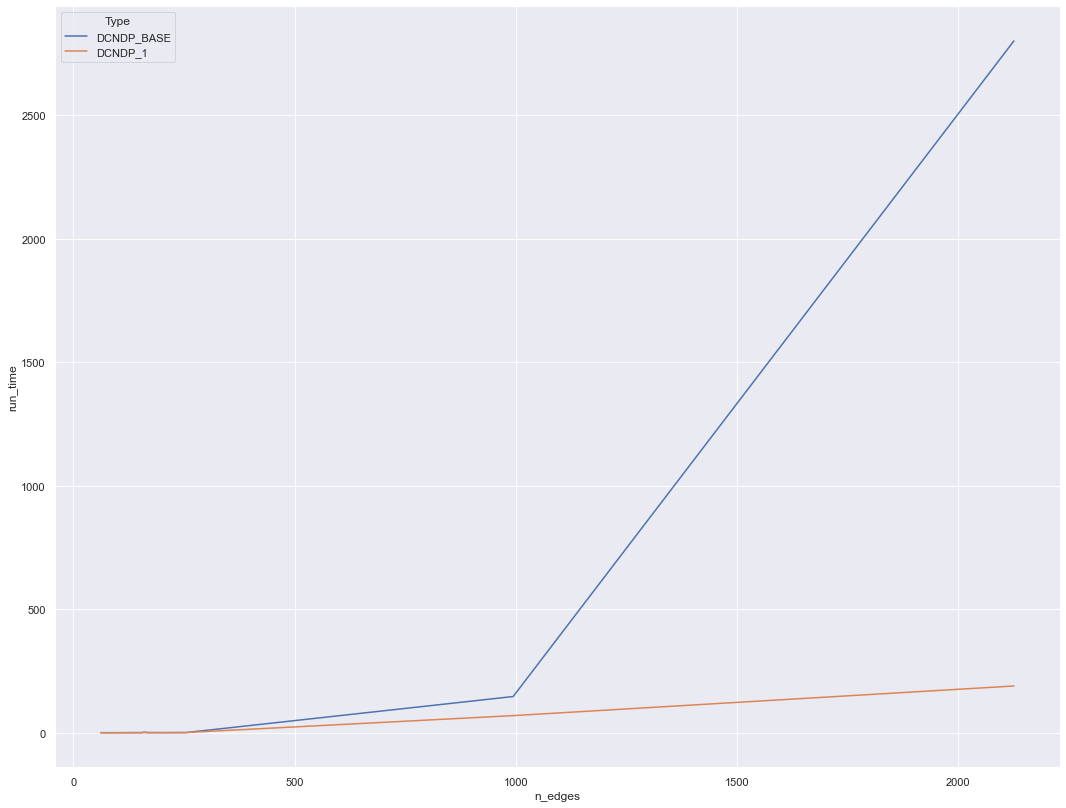

In [55]:
ax = sns.lineplot(
    data=dcndp_base_one,
    x='n_edges',
    y='run_time',
    hue='Type',
)
fig = ax.get_figure()
fig.savefig("figures/dcndp_base_vs_one_b_5%.jpeg")

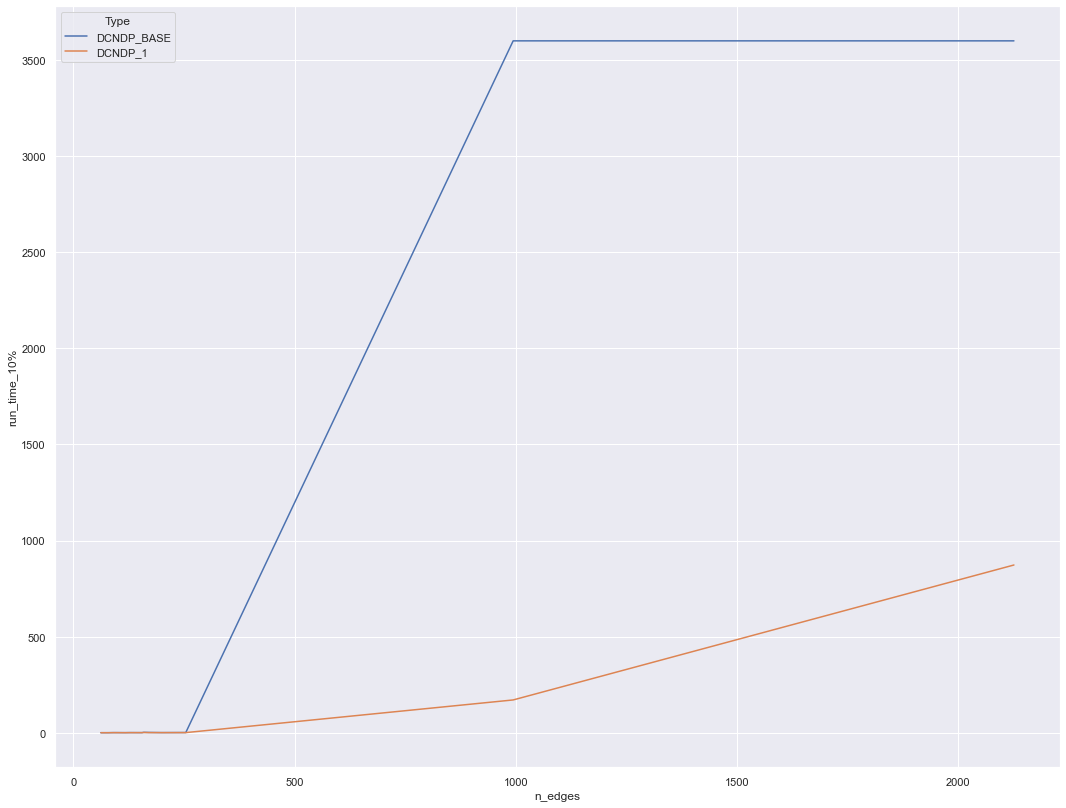

In [54]:
ax = sns.lineplot(
    data=dcndp_base_one,
    x='n_edges',
    y='run_time_10%',
    hue='Type',
)
fig = ax.get_figure()
fig.savefig("figures/dcndp_base_vs_one_b_10%.jpeg")

# Comparison DCNDP Base vs 2

In [58]:
dcndp_base_two = pd.read_csv("dcndp_base_versus_two.csv", delimiter=';')

In [59]:
dcndp_base_two['run_time'] = dcndp_base_two['run_time'].apply(lambda v : v.replace(',', '.')).astype(float)
dcndp_base_two['run_time_10%'] = dcndp_base_two['run_time_10%'].apply(lambda v : v.replace(',', '.')).astype(float)

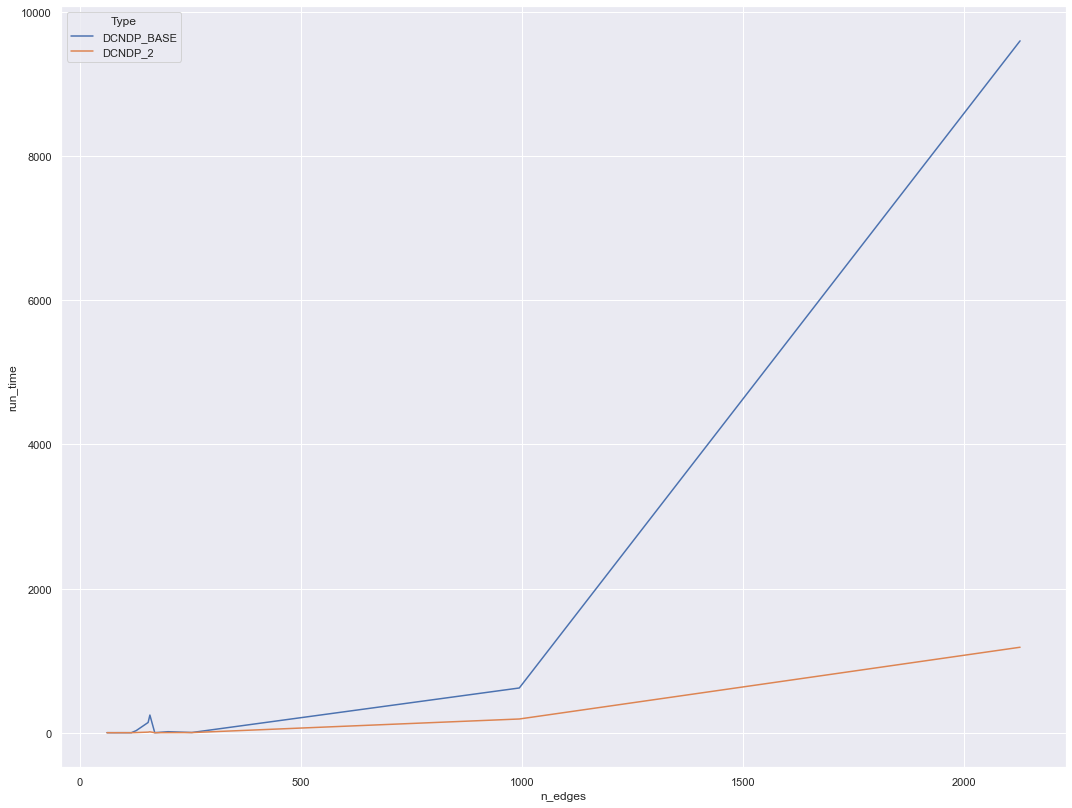

In [62]:
ax = sns.lineplot(
    data=dcndp_base_two,
    x='n_edges',
    y='run_time',
    hue='Type',
)
fig = ax.get_figure()
fig.savefig("figures/dcndp_base_vs_two_b_5%.jpeg")

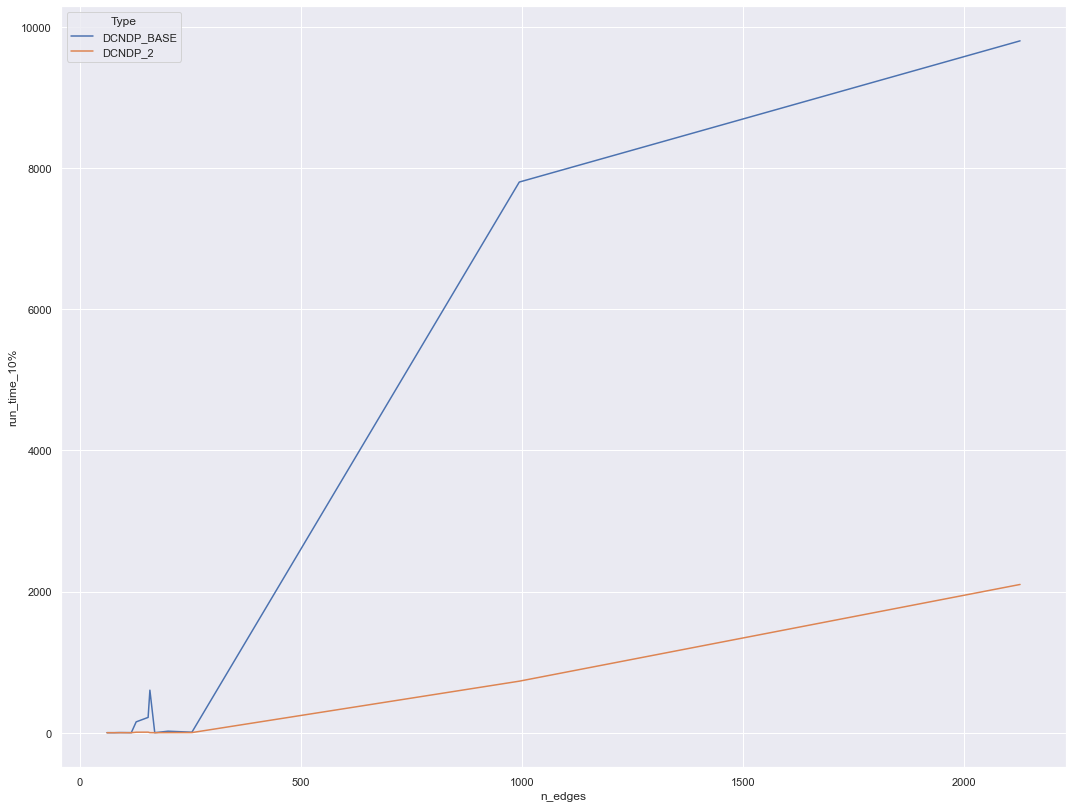

In [63]:
ax = sns.lineplot(
    data=dcndp_base_two,
    x='n_edges',
    y='run_time_10%',
    hue='Type',
)
fig = ax.get_figure()
fig.savefig("figures/dcndp_base_vs_two_b_10%.jpeg")